# Rodar anteriormente

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scypy as sp

# Exercício 1

In [ ]:
"""
             N(1)
     /                 \
  C(7)                 C(2)
   ||                  ||
  C(6) - C(5) = C(4) - C(3)

Existem ligações pi entre C(2) e C(3), entre C(4) e C(5) e entre C(6) e C(7).
"""

A azepina é uma molécula organica cíclica e volátil que comumente utilizada no processo de obtenção de certos farmacos anticonvulcionantes. Neste trabalho o método de Huckel será utilizado para determinar os niveis de energia dessa molécula, estudar seus estados de energia mais excitados.

--- Matriz de Hückel (Determinante Secular em forma matricial) ---
Os elementos da diagonal são (α - E)/β + h e os fora da diagonal são k.
Resolvendo Hψ = Eψ, onde α=0 e β=1, os autovalores são as energias.
[[1.5 0.8 0.  0.  0.  0.  0.8]
 [0.8 0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  1.  0.  0. ]
 [0.  0.  0.  1.  0.  1.  0. ]
 [0.  0.  0.  0.  1.  0.  1. ]
 [0.8 0.  0.  0.  0.  1.  0. ]]
------------------------------------------------------------

--- Níveis de Energia (E = α + xβ) ---
+---------------+---------------+------------+
| Orbital (ψ)   |   Energia (x) | Ocupação   |
+===============+===============+============+
| ψ_1           |       -1.8019 | 2 e-       |
+---------------+---------------+------------+
| ψ_2           |       -1.4251 | 2 e-       |
+---------------+---------------+------------+
| ψ_3           |       -0.445  | 2 e-       |
+---------------+---------------+------------+
| ψ_4           |        0.0423 | 2 e-       |
+---

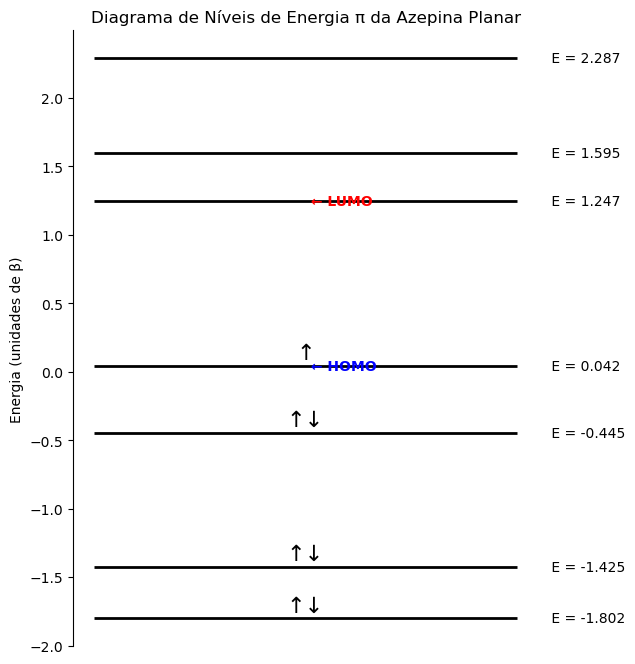

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def huckel_calculation_azepine():
    """
    Realiza o cálculo completo pelo método de Hückel para a molécula de 1H-Azepina,
    assumindo uma geometria planar hipotética.
    """
    # --- 1. Definição dos Parâmetros e Construção da Matriz ---

    # Parâmetros para o heteroátomo (Nitrogênio do tipo pirrólico)
    # O Nitrogênio contribui com 2 elétrons para o sistema pi.
    # h_N modifica a energia do orbital (integral de Coulomb)
    # k_CN modifica a energia de ligação (integral de ressonância)
    h_N = 1.5
    k_CN = 0.8

    # A matriz de Hückel (H) é construída. As energias são expressas em unidades de beta (β),
    # com a energia alfa (α) dos carbonos definida como 0.
    # H_ii = h (parâmetro de Coulomb)
    # H_ij = k (parâmetro de ressonância) se i e j são vizinhos, 0 caso contrário.

    # Matriz 7x7 para os 7 átomos do anel
    H = np.zeros((7, 7))

    H[0, 0] = h_N

    # Parâmetros de ressonância para as ligações C-C (valor padrão k=1)
    for i in range(1, 6):
        H[i, i + 1] = H[i + 1, i] = 1.0

    # Parâmetros de ressonância para as ligações N-C (N-1 com C-2 e C-7)
    H[0, 1] = H[1, 0] = k_CN
    H[0, 6] = H[6, 0] = k_CN

    print("--- Matriz de Hückel (Determinante Secular em forma matricial) ---")
    print("Os elementos da diagonal são (α - E)/β + h e os fora da diagonal são k.")
    print("Resolvendo Hψ = Eψ, onde α=0 e β=1, os autovalores são as energias.")
    print(H)
    print("-" * 60)

    # --- 2. Resolução do Determinante Secular ---
    # Resolver o problema de autovalores/autovetores.
    # Autovalores (eigenvalues) correspondem aos níveis de energia (x_i).
    # Autovetores (eigenvectors) são os coeficientes dos orbitais moleculares (c_ji).
    # A energia de um orbital i é E_i = α + x_i * β.
    # Como usamos x_i = (E-α)/β, os autovalores são os próprios x_i.
    eigenvalues, eigenvectors = np.linalg.eigh(H)

    # A função eigh já retorna os autovalores em ordem crescente.
    # Os autovetores estão nas colunas da matriz 'eigenvectors'
    mo_coeffs = eigenvectors.T  # Transpor para que cada linha seja um orbital

    # --- 3. Análise dos Resultados ---

    # Número de elétrons pi no sistema
    num_pi_electrons = 8
    # Número de orbitais ocupados
    num_occupied_orbitals = num_pi_electrons // 2

    # Cálculo das populações eletrônicas (q_r) para cada átomo r
    # q_r = Σ (g_i * c_ri^2) sobre todos os orbitais i
    # g_i é o número de ocupação (2 para ocupado, 0 para vazio)
    populations = np.zeros(7)
    for r in range(7): # Para cada átomo r
        q_r = 0
        for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
            q_r += 2 * (eigenvectors[r, i] ** 2)
        populations[r] = q_r

    # Cálculo das cargas formais pi
    # Carga = (elétrons pi contribuídos) - q_r
    pi_charges = np.array([2.0] + [1.0]*6) - populations

    # Cálculo das ordens de ligação pi (p_rs) entre átomos r e s
    # p_rs = Σ (g_i * c_ri * c_si) sobre todos os orbitais i
    bond_orders = np.zeros((7, 7))
    for r in range(7):
        for s in range(r + 1, 7):
            p_rs = 0
            # Apenas calcular para vizinhos para simplificar
            if H[r, s] != 0:
                for i in range(num_occupied_orbitals): # Somar sobre os orbitais OCUPADOS
                    p_rs += 2 * eigenvectors[r, i] * eigenvectors[s, i]
                bond_orders[r, s] = bond_orders[s, r] = p_rs


    # --- 4. Apresentação dos Resultados ---

    print("\n--- Níveis de Energia (E = α + xβ) ---")
    energy_headers = ["Orbital (ψ)", "Energia (x)", "Ocupação"]
    energy_data = []
    for i, energy in enumerate(eigenvalues):
        occupation = "2 e-" if i < num_occupied_orbitals else "0 e-"
        energy_data.append([f"ψ_{i+1}", f"{energy:.4f}", occupation])
    print(tabulate(energy_data, headers=energy_headers, tablefmt="grid"))

    # Identificar HOMO e LUMO
    homo_index = num_occupied_orbitals - 1
    lumo_index = num_occupied_orbitals
    homo_energy = eigenvalues[homo_index]
    lumo_energy = eigenvalues[lumo_index]
    print(f"\nHOMO: ψ_{homo_index + 1} (Energia = {homo_energy:.4f}β)")
    print(f"LUMO: ψ_{lumo_index + 1} (Energia = {lumo_energy:.4f}β)")
    print("-" * 60)

    print("\n--- Coeficientes dos Orbitais Moleculares (ψ_i) ---")
    mo_headers = ["Orbital"] + [f"Átomo {j+1}" for j in range(7)]
    mo_data = []
    for i, mo in enumerate(mo_coeffs):
        mo_data.append([f"ψ_{i+1}"] + [f"{c:.3f}" for c in mo])
    print(tabulate(mo_data, headers=mo_headers, tablefmt="grid"))
    print("-" * 60)

    print("\n--- Populações Eletrônicas e Cargas π ---")
    pop_headers = ["Átomo", "População π (q_r)", "Carga π"]
    pop_data = [("N-1", f"{populations[0]:.3f}", f"{pi_charges[0]:.3f}")]
    for i in range(1, 7):
        pop_data.append((f"C-{i+1}", f"{populations[i]:.3f}", f"{pi_charges[i]:.3f}"))
    print(tabulate(pop_data, headers=pop_headers, tablefmt="grid"))
    print(f"Soma total de elétrons π: {np.sum(populations):.2f}")
    print("-" * 60)

    print("\n--- Ordens de Ligação π ---")
    bo_headers = ["Ligação", "Ordem de Ligação π (p_rs)"]
    bo_data = [
        ("N1-C2", f"{bond_orders[0, 1]:.3f}"),
        ("C2-C3", f"{bond_orders[1, 2]:.3f}"),
        ("C3-C4", f"{bond_orders[2, 3]:.3f}"),
        ("C4-C5", f"{bond_orders[3, 4]:.3f}"),
        ("C5-C6", f"{bond_orders[4, 5]:.3f}"),
        ("C6-C7", f"{bond_orders[5, 6]:.3f}"),
        ("C7-N1", f"{bond_orders[6, 0]:.3f}"),
    ]
    print(tabulate(bo_data, headers=bo_headers, tablefmt="grid"))
    print("-" * 60)

    # --- 5. Diagrama de Níveis de Energia ---
    fig, ax = plt.subplots(figsize=(6, 8))
    ax.set_title("Diagrama de Níveis de Energia π da Azepina Planar")
    ax.set_ylabel("Energia (unidades de β)")
    ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    for i, energy in enumerate(eigenvalues):
        ax.hlines(y=energy, xmin=0.8, xmax=2.2, color='k', lw=2)
        ax.text(2.3, energy, f" E = {energy:.3f}", va='center')
        # Preenchimento eletrônico
        if i < num_occupied_orbitals-1:
            ax.text(1.5, energy + 0.05, "↑↓", ha='center', fontsize=16) # Duplamente ocupado
        elif i == num_occupied_orbitals-1:
            ax.text(1.5, energy + 0.05, "↑", ha='center', fontsize=16) # Singlet

    ax.text(1.5, homo_energy, " ← HOMO", va='center', color='blue', weight='bold')
    ax.text(1.5, lumo_energy, " ← LUMO", va='center', color='red', weight='bold')
    plt.show()

# Executa a função principal
if __name__ == "__main__":
    huckel_calculation_azepine()

--- Matriz de Hückel (Determinante Secular em forma matricial) ---
Os elementos da diagonal são (α - E)/β + h e os fora da diagonal são k.
Resolvendo Hψ = Eψ, onde α=0 e β=1, os autovalores são as energias.
[[1.5 0.8 0.  0.  0.  0.  0.8]
 [0.8 0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  1.  0.  0. ]
 [0.  0.  0.  1.  0.  1.  0. ]
 [0.  0.  0.  0.  1.  0.  1. ]
 [0.8 0.  0.  0.  0.  1.  0. ]]
------------------------------------------------------------

--- Níveis de Energia (E = α + xβ) ---
+---------------+---------------+------------+
| Orbital (ψ)   |   Energia (x) | Ocupação   |
+===============+===============+============+
| ψ_1           |       -1.8019 | 2 e-       |
+---------------+---------------+------------+
| ψ_2           |       -1.4251 | 2 e-       |
+---------------+---------------+------------+
| ψ_3           |       -0.445  | 2 e-       |
+---------------+---------------+------------+
| ψ_4           |        0.0423 | 2 e-       |
+---

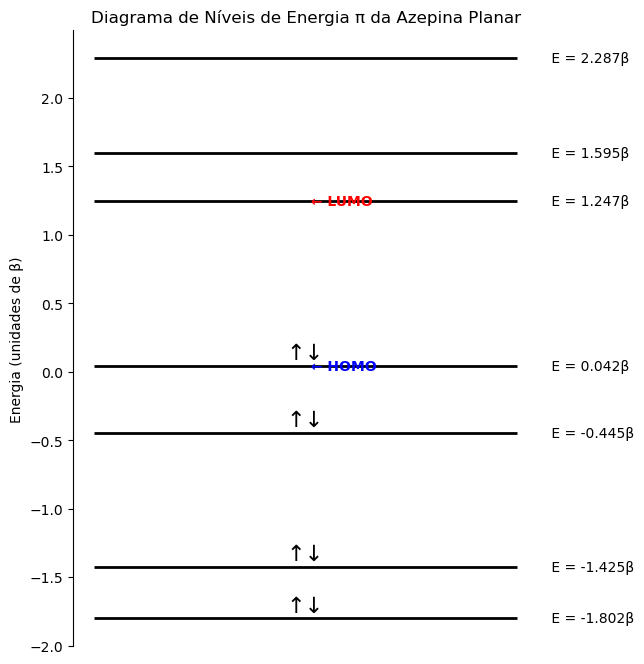

# Exercício 2